# Feature Engineering and Data Cleaning Process

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 150, 'display.max_rows', 150)

#importing necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as stats
import math
import folium
import geopandas as gpd

pd.set_option('display.max_columns', 150, 'display.max_rows', 150)

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('updated_df.csv')

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Checking what columns all our dataframes have in common

In [3]:
df19 = pd.read_csv('twnty19.csv')

In [4]:
df17 = pd.read_csv('twnty17.csv')

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df15 = pd.read_csv('twnty15.csv')

In [6]:
df13 = pd.read_csv('twnty13.csv')

In [7]:
df11 = pd.read_csv('twnty11.csv')

In [8]:
columns = df19.columns
columns = [x for x in columns if x in df17.columns]
columns = [x for x in columns if x in df15.columns]
columns = [x for x in columns if x in df13.columns]
columns = [x for x in columns if x in df11.columns]

### Finding the columns not in common and dropping them from the data frame

In [9]:
drop_columns = df.columns
drop_columns = [x for x in drop_columns if x not in columns]

In [10]:
df.drop(['q6orig',
 'q7orig',
 'record',
 'orig_rec',
 'Texting and driving',
 'Gun carrying past 12 mos',
 'Sexual violence',
 'Sexual dating violence',
 'Physical dating violence',
 'Smoked > 10 cigarettes',
 'Electronic vapor product use',
 'Current electronic vapor use',
 'EVP from store',
 'All tobacco product cessation',
 'Current binge drinking',
 'Largest number of drinks',
 'Ever synthetic marijuana use',
 'Sex of sexual contacts',
 'Sexual identity',
 'Physical activity >= 5 days',
 'Concussion',
 'STD testing',
 'Oral health care',
 'Grades in school',
 'Current prescription pain medicine use',
 'Sports drinks',
 'Plain water',
 'Food allergies',
 'Sunscreen',
 'Difficulty concentrating',
 'How well speak English',
 'Smoked>10 cigarettes',
 'Current electronic vapor product use',
 'Ever alcohol use',
 'Physical activity>=5 days',
 'Drive when using marijuana',
 'Sunburn',
 'Bicycle helmet use',
 'Gun carrying',
 'Injurious physical fighting',
 'Cigarette from store',
 'Smoking cessation',
 '5 or more drinks in a row',
 'Usual use of marijuana',
 'qnowt',
 'qnobese'],axis =1, inplace = True)

In [11]:
df.shape

(73074, 79)

### Examining columns with null values

In [12]:
df.isnull().sum()

Unnamed: 0                                 0
YEAR                                       0
raceeth                                 1766
How old are you                          358
What is your sex                         469
In what grade are you                    521
Are you Hispanic/Latino                 1268
What is your race                       9778
How tall are you                        6566
How much do you weigh                   6566
Seat belt use                           7482
Riding with a drinking driver           1534
Drinking and driving                    5401
Weapon carrying                         8093
Weapon carrying at school               1918
Safety concerns at school               2865
Threatened at school                     935
Physical fighting                       8684
Physical fighting at school             1611
Forced sexual intercourse               3793
Bullying at school                      1363
Electronic bullying                     2151
Sad or hop

### Data Visualization

Target Variable
Considered suicide
1.0    12695
2.0    59513
Name: Considered suicide, dtype: int64


/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


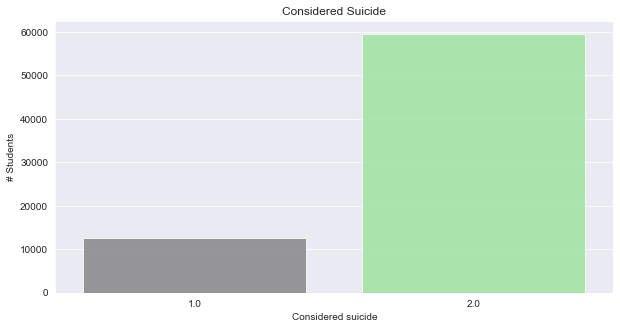

In [13]:
# Count of 'Considered Suicide'
print('Target Variable')
print(df.groupby(['Considered suicide'])['Considered suicide'].count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['Considered suicide'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Considered Suicide')
plt.ylabel('# Students')
plt.show()

Target Variable
Attempted suicide
1.0    53968
2.0     2795
3.0     1628
4.0      361
5.0      517
Name: Attempted suicide, dtype: int64


/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


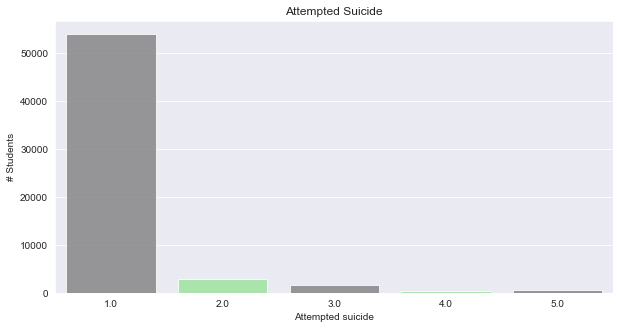

In [14]:
# Count of 'Considered Suicide'
print('Target Variable')
print(df.groupby(['Attempted suicide'])['Attempted suicide'].count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['Attempted suicide'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Attempted Suicide')
plt.ylabel('# Students')
plt.show()

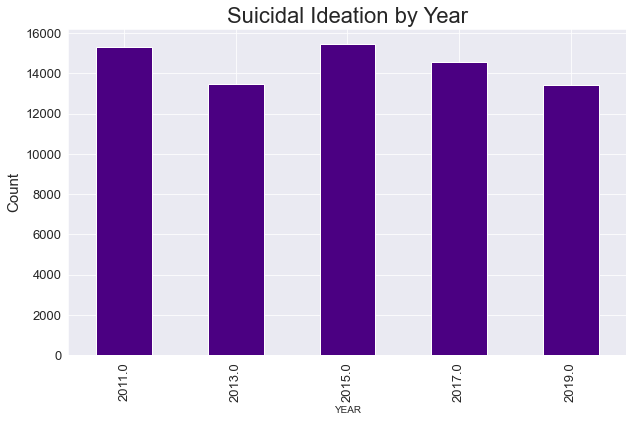

In [15]:
# plt.bar(df['YEAR'], df.groupby('YEAR')['Considered suicide'].count())
# df.groupby('YEAR')['Considered suicide'].count()
forplot = df.groupby(['YEAR'])['Considered suicide'].count()

ax = forplot.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Suicidal Ideation by Year", fontsize=22)
ax.set_ylabel("Count", fontsize=15);
plt.show()

Suicidal Ideation by Year


Considered suicide   1.0    2.0
YEAR                           
2011.0              2424  12869
2013.0              2259  11232
2015.0              2808  12626
2017.0              2571  11982
2019.0              2633  10804


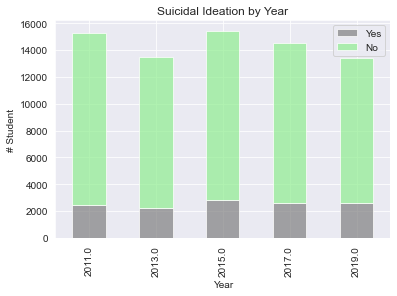

In [16]:
# School Bullying Summary
print('Suicidal Ideation by Year')
print('\n')
print(df.groupby(['YEAR','Considered suicide'])['Considered suicide'].count().unstack())

bulsch = df.groupby(['YEAR','Considered suicide'])['Considered suicide'].count().unstack()
p2 = bulsch.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_title('Suicidal Ideation by Year')
p2.set_xlabel('Year')
p2.set_ylabel('# Student')
p2.legend(['Yes','No'])
plt.show()

In [17]:
# sns.pairplot(df)

In [18]:
df.corr()

,Unnamed: 0,YEAR,raceeth,How old are you,What is your sex,In what grade are you,Are you Hispanic/Latino,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Weapon carrying,Weapon carrying at school,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Current smokeless tobacco use,Current cigar use,Initiation of alcohol use,Current alcohol use,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever prescription pain medicine use,Ever cocaine use,Ever inhalant use,Ever heroin use,Ever methamphetamine use,Ever ecstasy use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Perception of weight,Weight loss,Fruit juice drinking,Fruit eating,Green salad eating,Potato eating,Carrot eating,Other vegetable eating,No soda drinking,No milk drinking,Breakfast eating,Television watching,Computer use,PE attendance,Sports team participation,HIV testing,Asthma,Sleep,Ever used LSD,Muscle strengthening,Indoor tanning,BMIPCT,weight,stratum,psu
Unnamed: 0,1.000000,-9.795474e-01,-0.004268,0.042600,0.008104,0.024682,-0.051628,-0.010235,-0.012557,-0.043921,0.072057,-0.191637,0.024321,0.028741,-0.008599,0.012912,0.080368,0.031130,-0.009895,0.015469,0.010771,0.044532,0.030350,0.022135,-0.001778,-0.003259,-0.161610,0.069605,0.113028,0.034818,0.064869,0.062619,0.074184,0.070127,0.054876,0.029507,0.027297,0.056262,0.031250,0.050780,0.015561,0.020935,0.062797,0.029197,0.018223,-0.050693,-0.093550,0.058860,0.115488,0.094462,0.086595,0.071850,0.075072,0.005504,0.009853,0.115046,-0.006633,0.024642,0.026758,0.009980,0.003332,0.124532,0.122780,0.029836,0.180258,-0.049393,0.003408,-0.010396,-0.067160,0.001284,0.076211,0.023748,0.046001,0.086715,-0.003802,-3.382139e-02,-0.012158,-0.171487
YEAR,-0.979547,1.000000e+00,0.004147,-0.059129,-0.011171,-0.033276,0.050382,0.004584,0.005552,0.039902,-0.071890,0.188081,-0.027524,-0.029343,0.012584,-0.011524,-0.081020,-0.026385,0.007077,-0.013739,-0.009515,-0.045928,-0.030931,-0.022799,0.004075,0.005553,0.168782,-0.077232,-0.117414,-0.039065,-0.067742,-0.071470,-0.077522,-0.073278,-0.062238,-0.035711,-0.032387,-0.060466,-0.028625,-0.050279,-0.011026,-0.018699,-0.060112,-0.028738,-0.014450,0.047587,0.100711,-0.067347,-0.121951,-0.100771,-0.093060,-0.078220,-0.081129,-0.010398,-0.011129,-0.121249,-0.002191,-0.030426,-0.032705,-0.015103,-0.009350,-0.134262,-0.131748,-0.033251,-0.185403,0.048272,-0.023139,0.003874,0.068506,-0.001056,-0.082961,-0.021964,-0.049141,-0.089770,0.001888,-2.688555e-07,-0.000531,0.216831
raceeth,-0.004268,4.146691e-03,1.000000,-0.016041,-0.008259,-0.004932,-0.593307,-0.035909,-0.002671,0.055577,0.034560,0.025666,0.025864,0.018532,0.015050,0.007487,-0.004061,-0.001932,-0.019405,-0.035603,-0.036388,-0.055853,-0.032022,-0.031841,0.013145,0.017558,-0.059731,0.072010,0.028524,0.015842,0.004971,0.067960,0.067382,0.069086,0.036009,0.041185,0.014365,0.036965,0.044102,0.022969,0.013591,0.022781,0.027639,0.019986,0.005190,-0.059414,0.003489,0.012833,-0.031816,-0.009488,-0.005922,0.003820,-0.007068,0.050657,-0.040129,-0.017121,0.030872,0.022830,0.013345,0.042362,-0.021675,-0.006344,0.052290,0.006145,-0.049311,-0.011759,0.036338,-0.000910,0.033610,0.009703,0.017810,0.034634,0.020293,0.006822,0.024961,8.853698e-03,0.225715,-0.019592
How old are you,0.042600,-5.912905e-02,-0.016041,1.000000,0.035548,0.848921,-0.004468,0.123989,0.174330,0.034431,0.021181,0.216510,0.029438,0.012585,-0.018416,-0.033486,-0.052863,-0.063267,-0.038073,0.091269,0.042836,-0.005457,0.025998,0.025744,-0.038462,-0.036141,-0.145

Affect of School Bullying on Suicidal Ideation


Considered suicide   1.0    2.0
Bullying at school             
1.0                 4938   8420
2.0                 7557  50394


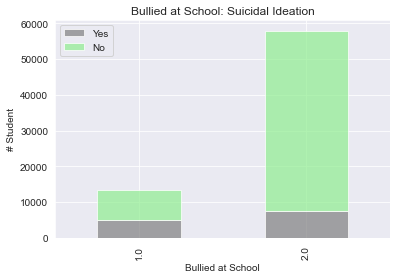

In [19]:
# School Bullying Summary
print('Affect of School Bullying on Suicidal Ideation')
print('\n')
print(df.groupby(['Bullying at school','Considered suicide'])['Bullying at school'].count().unstack())

bulsch = df.groupby(['Bullying at school','Considered suicide'])['Bullying at school'].count().unstack()
p2 = bulsch.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_title('Bullied at School: Suicidal Ideation')
p2.set_xlabel('Bullied at School')
p2.set_ylabel('# Student')
p2.legend(['Yes','No'])
plt.show()

### Feature Engineering

In [20]:
conditions = [(df['Ever cocaine use']>=2)|(df['Ever prescription pain medicine use']>=2)|
              (df['Ever inhalant use']>=2)|(df['Ever heroin use']>=2)|(df['Ever methamphetamine use']>=2)|
              (df['Ever ecstasy use']>=2)]
values = [1]

df['Has used hard drugs'] = np.select(conditions, values)

In [21]:
# create a list of our conditions
conditions = [
    (df['Fruit juice drinking'] > 2) | (df['Fruit eating'] > 2) | (df['Green salad eating'] > 2) |
    (df['Potato eating'] > 2) | (df['Carrot eating'] > 2)| (df['Other vegetable eating'] > 2) |
    (df['No soda drinking'] <= 2) | (df['No milk drinking'] > 2)| (df['Breakfast eating'] > 4)
    ]
# create a list of the values we want to assign for each condition
values = [1]
# create a new column and use np.select to assign values to it using our lists as arguments
df['healthy_eating'] = np.select(conditions, values)

In [22]:
conditions = [(df['PE attendance']>3)|(df['Sports team participation']>=2)|
             (df['Muscle strengthening']>3)]
values = [1]
df['regular_activity'] = np.select(conditions, values)

### Dropping columns that we used for feature engineering and others

In [23]:
columns_to_drop = ['What is your race','Are you Hispanic/Latino','Indoor tanning','Fruit juice drinking', 
                   'Fruit eating', 'Green salad eating',
                   'Potato eating', 'Carrot eating', 'Other vegetable eating',
                   'No soda drinking', 'No milk drinking', 'Breakfast eating','PE attendance',
                   'Sports team participation','Muscle strengthening','Ever cocaine use', 'Ever prescription pain medicine use',
                   'Ever inhalant use', 'Ever heroin use', 'Ever methamphetamine use',
                   'Ever ecstasy use','Unnamed: 0']
df.drop(columns =columns_to_drop,axis=1,inplace=True)

### Dropping all rows that have NA for our target variable

In [24]:
df.dropna(subset=['Considered suicide','Attempted suicide','Alcohol/drugs and sex','Condom use'],inplace = True, axis = 0)

### Checking the shape of the dataframe

In [25]:
df.shape

(53548, 60)

### Simple imputer

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
df = pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df), columns = df.columns)

In [28]:
df.shape

(53548, 60)

In [29]:
df.head()

,YEAR,raceeth,How old are you,What is your sex,In what grade are you,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Weapon carrying,Weapon carrying at school,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Current smokeless tobacco use,Current cigar use,Initiation of alcohol use,Current alcohol use,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Perception of weight,Weight loss,Television watching,Computer use,HIV testing,Asthma,Sleep,Ever used LSD,BMIPCT,weight,stratum,psu,Has used hard drugs,healthy_eating,regular_activity
0,2019.0,7.0,5.0,2.0,2.0,1.63,54.89,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,5.0,2.0,2.0,4.0,1.0,46.882141,1.6659,213.0,57923.0,0.0,1.0,1.0
1,2019.0,8.0,4.0,2.0,2.0,1.60,53.98,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,62.232194,1.3851,213.0,57923.0,0.0,1.0,1.0
2,2019.0,8.0,4.0,1.0,2.0,1.68,43.09,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,1.0,0.590171,1.4958,213.0,57923.0,0.0,1.0,0.0
3,2019.0,5.0,4.0,2.0,2.0,1.78,68.95,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,5.0,3.0,7.0,7.0,4.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,7.0,7.0,2.0,3.0,4.0,3.0,69.786634,1.7114,213.0,57923.0,1.0,1.0,0.0
4,2019.0,6.0,5.0,2.0,2.0,1.78,58.97,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,4.0,2.0,2.0,2.0,1.0,16.739994,1.6659,213.0,57923.0,0.0,1.0,0.0


In [30]:
df['Sad or hopeless'].value_counts()

2.0    36305
1.0    17243
Name: Sad or hopeless, dtype: int64

In [31]:
df.isnull().sum().sum()

0

In [32]:
df.describe()

,YEAR,raceeth,How old are you,What is your sex,In what grade are you,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Weapon carrying,Weapon carrying at school,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Current smokeless tobacco use,Current cigar use,Initiation of alcohol use,Current alcohol use,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Perception of weight,Weight loss,Television watching,Computer use,HIV testing,Asthma,Sleep,Ever used LSD,BMIPCT,weight,stratum,psu,Has used hard drugs,healthy_eating,regular_activity
count,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,5.354800e+04,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000
mean,2014.679092,5.126653,5.087286,1.481829,2.480541,1.688293,67.017479,4.352338,1.388493,1.519328,1.408661,1.103533,1.109715,1.141219,1.520169,1.138156,1.927374,1.811291,1.854560,1.677990,1.824998,1.855849,1.140453,1.131284,1.671080,2.055726,1.348248,1.173527,1.217394,3.429316,1.576417,2.541570,2.324419,2.699186,1.572085,1.057444,1.018152,1.766359,1.571917,2.992007,2.145346,1.896934,1.786341,1.606876,2.300627,3.206488,2.021831,3.443079,4.081889,1.991111,1.821506,3.656439,1.109416,6.213372e+01,1.082591,164.717002,264860.247479,0.220662,0.945003,0.752783
std,2.815448,1.510659,1.228198,0.499674,1.121861,0.098875,16.683080,0.939576,0.914615,0.702596,1.094574,0.584567,0.498348,0.727962,1.216012,0.613862,0.259525,0.391281,0.352547,0.467251,0.379972,0.351246,0.538586,0.470844,0.469825,1.884897,1.184557,0.870642,0.851894,2.188578,1.070177,2.454069,2.050970,2.191601,1.282910,0.444195,0.177988,0.423150,0.494806,2.505909,1.773185,1.278619,0.933065,0.763048,1.805916,0.779903,1.163381,1.808349,2.097703,0.441633,0.470584,1.307949,0.538331,2.784126e+01,0.941813,50.440779,178287.459596,0.414697,0.227977,0.431398
min,2011.000000,1.000000,1.000000,1.000000,1.000000,1.270000,24.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.039970e-08,0.028600,101.000000,10530.000000,0.000000,0.000000,0.000000
25%,2013.000000,5.000000,4.000000,1.000000,1.000000,1.630000,56.700000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0000

In [33]:
df.to_csv('modeling_dataset.csv')